# **Imports:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve, validation_curve
from scipy.stats import spearmanr, pearsonr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# **Loading Dataset:**

In [2]:
# Loading our dataset
# Follow this Link to download and use the dataset: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers/data
# Apply the following model to classify if the customer left the bank or not? --> Target Variable: exited
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Do all the pre-processing.
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df = pd.get_dummies(df, drop_first=True)
# target
X = df.drop(columns=["Exited"])
y = df["Exited"]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Filter-based features selection techniques:**

**Any Correlation should be done using Pearson and Spearman**

**Question 1:**

What are the most important 4 features for the output?

In [4]:
# Measure the feature importnace for all features in your dataset using (Fisher’s Score)
fisher_score = SelectKBest(score_func=f_classif, k='all')
fisher_score.fit(X_train, y_train)
fisher_scores = fisher_score.scores_

In [5]:
# Measure the feature importnace for all features in your dataset using (Correlation Coefficient)
corr_scores = np.array([pearsonr(X.iloc[:, i], y)[0] for i in range(X.shape[1])])

In [6]:
# Measure the feature importnace for all features in your dataset using (Variance Threshold) --> (Try 3 different thresholds and Compare!)
vt1 = VarianceThreshold(threshold=0.01)
vt2 = VarianceThreshold(threshold=0.05)
vt3 = VarianceThreshold(threshold=0.1)
X_vt1 = vt1.fit_transform(X_train)
X_vt2 = vt2.fit_transform(X_train)
X_vt3 = vt3.fit_transform(X_train)

In [27]:
print(X_vt1,X_vt2 , X_vt3)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]] [[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]] [[ 0.35649971 -0

**Question 2:**

Are there any features taht are dependent on each other?

In [7]:
# Write your code to acieve the answer here.
correlated_features = set()
corr_matrix = X.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

**Question 3:**

From Question 1, Have you found the most correlated feature withe target variable? Now find the most correlated 3 features with it using Chi-squre Test Scores.

In [8]:
# Write your code to acieve the answer here.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi2_scores, _ = chi2(X_scaled, y)
chi2_top3 = np.argsort(chi2_scores)[-3:]


**Question 4:**

From Questions 1, and 3; How many features do you have now as outputs? Use them (instead of all features) to re-build the previous 3 models.

In [9]:
# Write your code to acieve the answer here.
selected_features = list(chi2_top3) + list(np.argsort(fisher_scores)[-4:])
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# **Learning Curve**

##**Learning Curve for KNN:**


In [12]:
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
nn = MLPClassifier()

**Explain The Result:**

.........................................

##**Learning Curve for Logestic Regression:**

In [13]:
knn.fit(X_train_selected, y_train)
log_reg.fit(X_train_selected, y_train)
nn.fit(X_train_selected, y_train)

MLPClassifier()

**Explain The Result:**

.........................................

##**Learning Curve for Neural Network:**

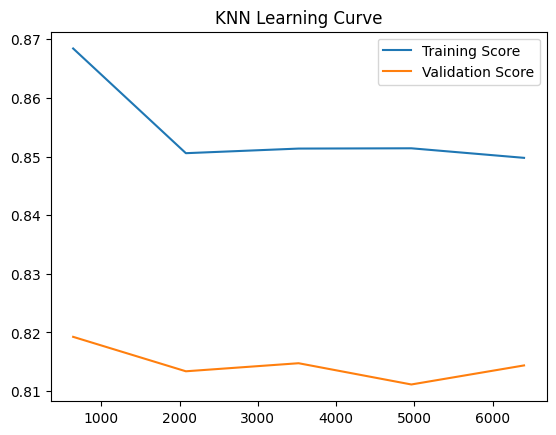

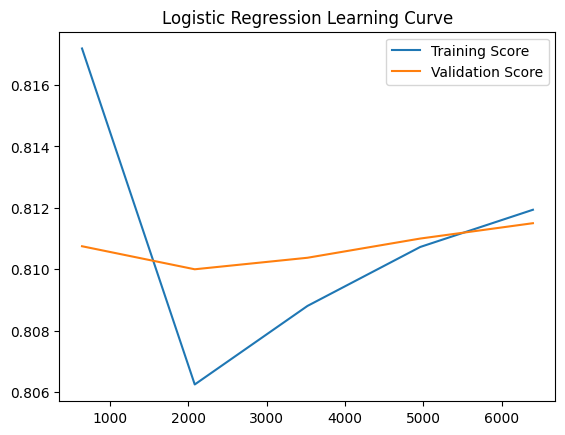

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

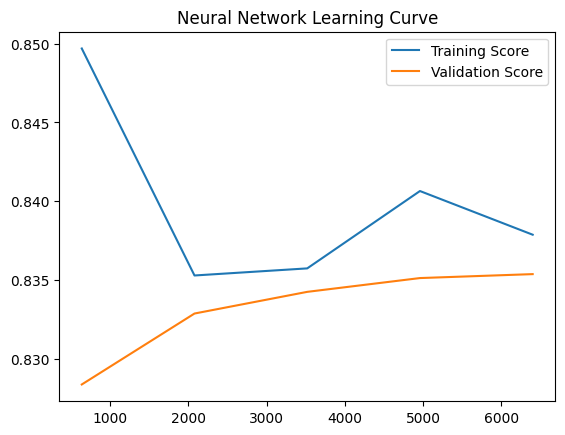

In [14]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
    plt.title(title)
    plt.legend()
    plt.show()

plot_learning_curve(knn, X_train_selected, y_train, "KNN Learning Curve")
plot_learning_curve(log_reg, X_train_selected, y_train, "Logistic Regression Learning Curve")
plot_learning_curve(nn, X_train_selected, y_train, "Neural Network Learning Curve")

**Explain The Result:**

.........................................

# **Validation Curve:**

In [17]:
def plot_validation_curve(model, X, y, param_name, param_range, title):
    train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=5) # Changed how param_name and param_range are passed
    plt.plot(param_range, train_scores.mean(axis=1), label='Training Score')
    plt.plot(param_range, test_scores.mean(axis=1), label='Validation Score')
    plt.title(title)
    plt.legend()
    plt.show()

##**Validation Curve for KNN:**

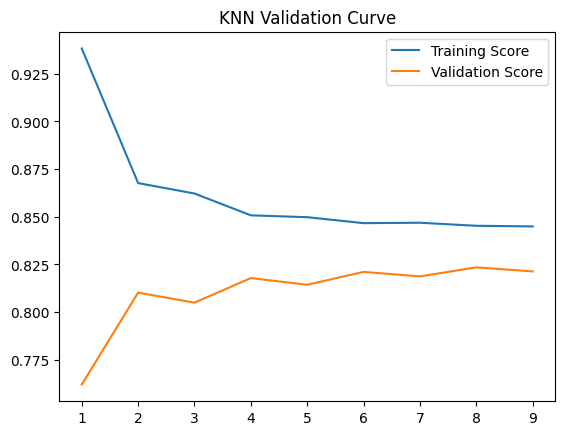

In [18]:
plot_validation_curve(knn, X_train_selected, y_train, "n_neighbors", range(1, 10), "KNN Validation Curve")

**Explain The Result:**

.........................................

##**Validation Curve for Logetstic Regression:**

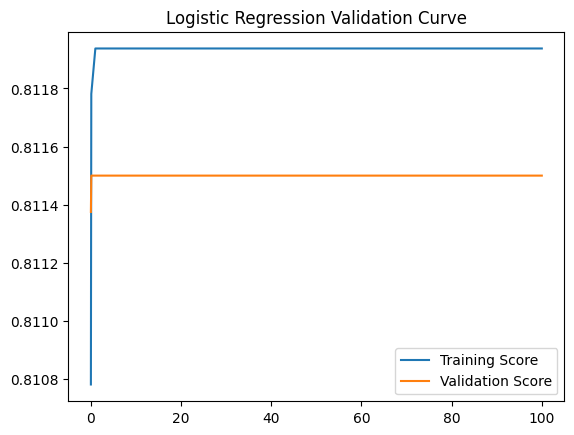

In [19]:
plot_validation_curve(log_reg, X_train_selected, y_train, "C", np.logspace(-2, 2, 5), "Logistic Regression Validation Curve")

**Explain The Result:**

.........................................

# **Confusion Matrix:**

##**Confusion Matrix for KNN:**

In [21]:
y_pred_knn = knn.predict(X_test_selected)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

Confusion Matrix for KNN:
 [[1495  112]
 [ 225  168]]


- How many True Negatives? - What does this number mean?

##**Confusion Matrix for Logetstic Regression:**

In [22]:
y_pred_log_reg = log_reg.predict(X_test_selected)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

Confusion Matrix for Logistic Regression:
 [[1559   48]
 [ 316   77]]


- How many False Positives?  What does this number mean?

##**Confusion Matrix for NN:**

In [23]:
y_pred_nn = nn.predict(X_test_selected)
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix for Neural Network:\n", cm_nn)

Confusion Matrix for Neural Network:
 [[1560   47]
 [ 255  138]]


- How many False Negatives?  What does this number mean?

#**Compute F1-Score for all models:**

In [24]:
print("F1 Score for KNN:", classification_report(y_test, y_pred_knn))
print("F1 Score for Logistic Regression:", classification_report(y_test, y_pred_log_reg))
print("F1 Score for Neural Network:", classification_report(y_test, y_pred_nn))

F1 Score for KNN:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.60      0.43      0.50       393

    accuracy                           0.83      2000
   macro avg       0.73      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000

F1 Score for Logistic Regression:               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.20      0.30       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.60      2000
weighted avg       0.79      0.82      0.78      2000

F1 Score for Neural Network:               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.75      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.80      0.66      0.69    

## **Receiver Operating Characteristic (ROC) Curve For Logestic Regression:**

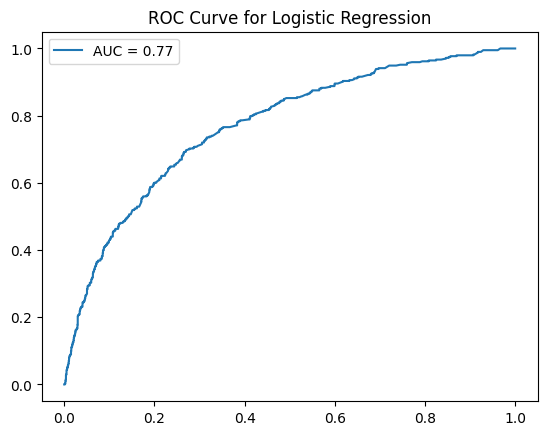

In [25]:
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

Diiferntiate between:

- High AUC (close to 1)

- Low AUC (close to 0)

- AUC around 0.5